In [1]:
import pickle
import numpy as np
import networkx as nx
import community
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
with open('verb_embeddings.p', 'rb') as f:
    embeddings = pickle.load(f)

with open('tSVO_rd.p', 'rb') as f:
    verbs, objects, pairs, = pickle.load(f)

In [3]:
embeddings = embeddings.reshape(1050, 18000)

In [7]:
similarities = np.zeros([embeddings.shape[0], embeddings.shape[0]])

In [11]:
for i, x in enumerate(embeddings):
    for j, y in enumerate(embeddings):
        if j < i: continue
        dist = np.trace(np.matmul(x.T,y))
        similarities[i,j] = dist
        similarities[j,i] = dist

In [12]:
vect_norms = np.array([np.linalg.norm(v) for v in embeddings])
print(vect_norms.shape)

(1050,)


In [13]:
embeddings = embeddings.T * 1/vect_norms

In [14]:
embeddings = embeddings.T

In [15]:
sims = np.matmul(embeddings, embeddings.T)

ValueError: shapes (1050,60,300) and (300,60,1050) not aligned: 300 (dim 2) != 60 (dim 1)

In [88]:
G = nx.Graph()

for (i,j), sim in tqdm(np.ndenumerate(similarities)):
        G.add_node(i)
        G.add_node(j)
        G.add_edge(i,j, weight=np.asscalar(sim) )

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [89]:
communities = community.best_partition(G, weight="weight")

In [74]:
clusters = []
for cluster_id in list(set(communities.values())):
    nodes = [k for k, v in communities.items() if v == cluster_id]
    clusters.append([nodes])
    print(len(nodes))



395
480
15
59
12
18
1
18
21
18
13


In [90]:
clusters = sorted(clusters, key=lambda x: len(x), reverse=True)

In [91]:
for i, cluster in enumerate(clusters):
    print('---- {} ----'.format(i))
    print([verbs[item+1] for item in cluster[0]])

---- 0 ----
['maintain', 'impede', 'guarantee', 'commit', 'improve', 'write', 'examine', 'allow', 'prepare', 'give', 'further', 'promote', 'regard', 'thank', 'safeguard', 'attach', 'mitigate', 'welcome', 'begin', 'change', 'continue', 'encourage', 'kid', 'strengthen', 'offer', 'represent', 'congratulate', 'have', 'emphasize', 'meet', 'ask', 'request', 'intensify', 'recognize', 'miss', 'identify', 'pose', 'resume', 'explode', 'blow', 'lose', 'carry', 'support', 'open', 'send', 'transmit', 'love', 'br', 'ratify', 'help', 'apply', 'respect', 'join', 'supply', 'let', 'draft', 'recall', 'head', 'find', 'scare', 'go', 'happen', 'challenge', 'state', 'renumber', 'govern', 'accommodate', 'start', 'forget', 'verify', 'endorse', 'pend', 'speak', 'mark', 'suit', 'emphasise', 'got', 'demonstrate', 'show', 'confirm', 'organize', 'generate', 'betray', 'exchange', 'exercise', 'lack', 'warn', 'organise', 'bother', 'stand', 'familiarise', 'return', 'analyse', 'stabilize', 'earn', 'aggravate', 'attract'

In [41]:
vectors = np.array(vectors)

In [16]:
def project(cluster_embeddings, projection_dim=2):
    """
    Takes an array of shape (N, 300) and returns a (N, projection_dim) compression
    """
    U, s, Vt = np.linalg.svd(cluster_embeddings)  # Decompose with SVD
    S = np.diag(s[:projection_dim])  # Convert s vector to S diagonal matrix
    V = np.transpose(Vt)  # V = Vt.T
    V = V[:projection_dim, :projection_dim]  # Keep low dimensional square
    projections = np.dot((U[:, :projection_dim]), np.dot(S, V))  # P = USV'
    projections /= np.max(np.linalg.norm(projections, axis=1))  # Normalize by the maximum norm
    return projections

def visualize_projections(projections, verbs, scaling_constant=100, scaling_power=1.3, cmap='YlOrRd'):
    """
    Only for testing / internal consumption! Visualizes the projections
    """
    from matplotlib import pyplot as plt
    x = projections[:, 0]
    y = projections[:, 1]
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 25)
    ax.scatter(x, y,
                c=np.sqrt(np.power(x, 2) + np.power(y, 2)),
                cmap=cmap,
                alpha=0.88,
                edgecolors='grey')
    for i, k in enumerate(verbs.values()):
        #print(i)
        ax.annotate(k, (x[i], y[i]))
    plt.show()
    return ax

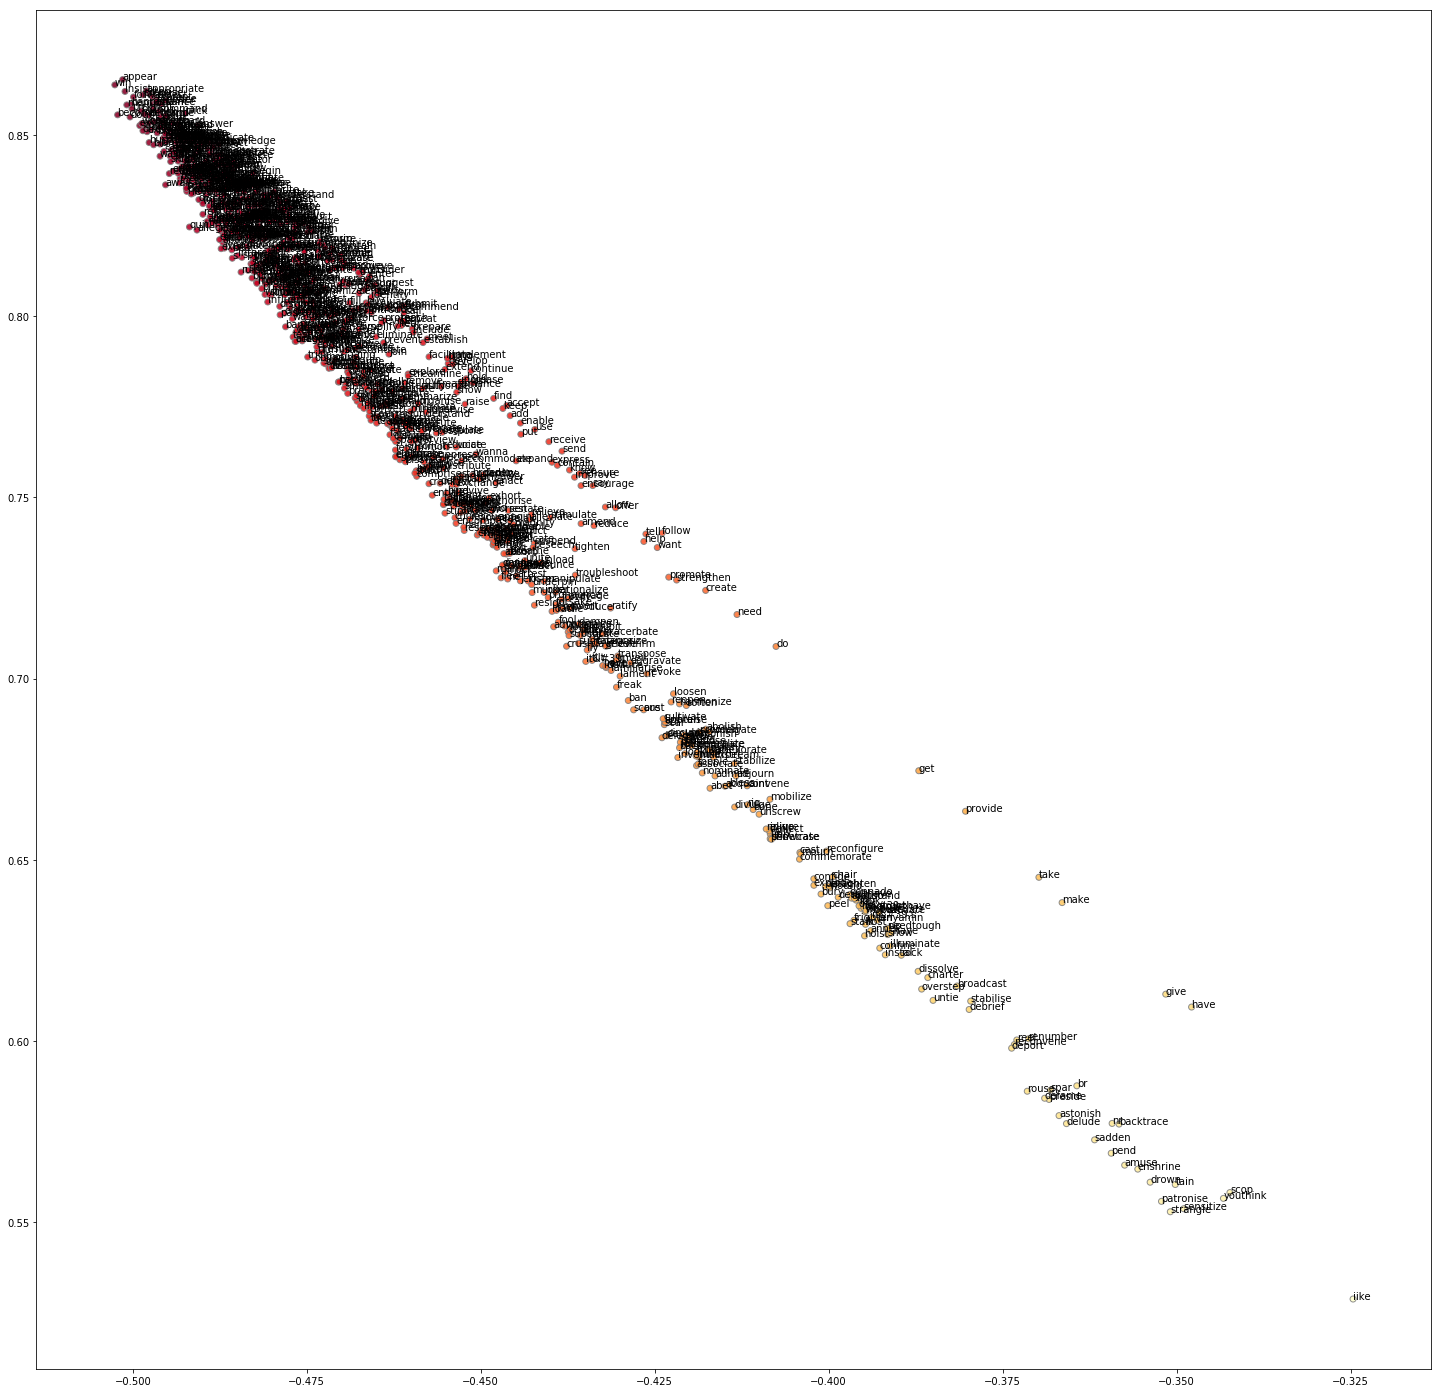

In [17]:
#e = embeddings.reshape(1050, 18000)
#p = project(e, projection_dim=2)
#print(p.shape)
ax = visualize_projections(p, verbs)